In [1]:
import sys
import os
import shutil
import numpy as np

# Move two upper directories, import benchmark, revert cwd
sys.path.append("../..")
import cmdbench
sys.path.pop()

# Summarize numpy array if it has more than 10 elements
np.set_printoptions(threshold=10)

strain_name = "2014C-3598"

In [2]:
def rem_if_exists(path):
    if os.path.exists(path):
        if(os.path.isfile(path)):
            os.remove(path)
        else:
            shutil.rmtree(path)
def get_last_n_lines(string, n):
    return "\n".join(string.split("\n")[-n:])

In [3]:
# Remove mccortex output file if it exists
rem_if_exists("%s_1.ctx" % strain_name)
# Remove mccortex output file if it exists
rem_if_exists("%s_2.ctx" % strain_name)
# Remove bloom filters if they exist
rem_if_exists("bloom-filters")
# Output after indexing 
rem_if_exists("test-berkeleydb")
rem_if_exists("test-berkeley.db")

# Delete indexed data
os.system("bigsi delete")

0

In [4]:
%%bash
# You might need to run this before starting jupyter notebook in your shell
export BIGSI_CONFIG=berkleydb.yaml

In [5]:
command_mccortex = "mccortex 17 build --nkmers 74000000 --threads 1 --kmer 17 --mem 20G --sample {0} --seq {0}.fastq.gz {0}.ctx"

# strain_1

command_mccortex_1 = command_mccortex.format(strain_name + "_1")
benchmark_results_mccortex_1 = cmdbench.benchmark_command(command_mccortex_1)

print(command_mccortex_1)
print(benchmark_results_mccortex_1.get_first_iteration())
print(get_last_n_lines(benchmark_results_mccortex_1.get_first_iteration().process.stderr_data, 10))

# strain_2

command_mccortex_2 = command_mccortex.format(strain_name + "_2")
benchmark_results_mccortex_2 = cmdbench.benchmark_command(command_mccortex_2)

print(command_mccortex_2)
print(benchmark_results_mccortex_2.get_first_iteration())
print(get_last_n_lines(benchmark_results_mccortex_2.get_first_iteration().process.stderr_data, 10))

mccortex 17 build --nkmers 74000000 --threads 1 --kmer 17 --mem 20G --sample 2014C-3598_1 --seq 2014C-3598_1.fastq.gz 2014C-3598_1.ctx
{
  'cpu': {
    'system_time': 0.18,
    'total_time': 0.37,
    'user_time': 0.19,
  },
  'disk': {
    'read_bytes': 0,
    'read_chars': 189080,
    'total_bytes': 2801664,
    'total_chars': 2990257,
    'write_bytes': 2801664,
    'write_chars': 2801177,
  },
  'memory': {
    'max': 839929856,
    'max_perprocess': 836558848,
  },
  'process': {
    'execution_time': 0.373,
    'stderr_data': '[04 Jun 2020 00:28:07-MuS][cmd]
                    /home/manzik/anaconda3/envs/bigsi_mccortex/bin/mccortex31
                    ...(52 hidden lines)',
    'stdout_data': '',
  },
  'time_series': {
    'cpu_percentages': array([  0. ,   0. , 145.9, ..., 154.4,   0. ,   0. ])
    'memory_bytes': array([ 43261952,  67612672,  90566656, ..., 249135104,  61091840,
         3371008])
    'sample_milliseconds': array([  1,   9,  16, ..., 351, 358, 364])
  },
}


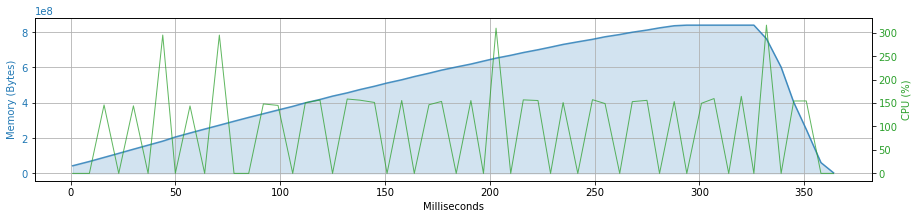

In [6]:
benchmark_results_mccortex_1.get_resources_plot()

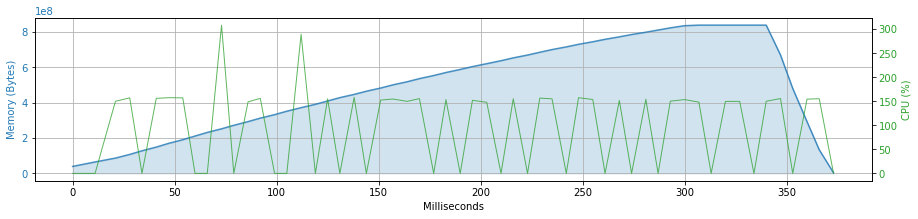

In [7]:
benchmark_results_mccortex_2.get_resources_plot()

In [8]:
command_bloom_filters = "bigsi bloom {0}.ctx bloom-filters/{0}.bloom"

# strain_1

command_bloom_filters_1 = command_bloom_filters.format(strain_name + "_1")
benchmark_results_bloom_filters_1 = cmdbench.benchmark_command(command_bloom_filters_1)

print(command_bloom_filters_1)
print(benchmark_results_bloom_filters_1.get_first_iteration())
print(get_last_n_lines(benchmark_results_bloom_filters_1.get_first_iteration().process.stdout_data, 10))

# strain_2

command_bloom_filters_2 = command_bloom_filters.format(strain_name + "_2")
benchmark_results_bloom_filters_2 = cmdbench.benchmark_command(command_bloom_filters_2)

print(command_bloom_filters_2)
print(benchmark_results_bloom_filters_2.get_first_iteration())
print(get_last_n_lines(benchmark_results_bloom_filters_2.get_first_iteration().process.stdout_data, 10))

bigsi bloom 2014C-3598_1.ctx bloom-filters/2014C-3598_1.bloom
{
  'cpu': {
    'system_time': 0.03,
    'total_time': 2.3,
    'user_time': 2.27,
  },
  'disk': {
    'read_bytes': 0,
    'read_chars': 10238524,
    'total_bytes': 9252864,
    'total_chars': 19488531,
    'write_bytes': 9252864,
    'write_chars': 9250007,
  },
  'memory': {
    'max': 74203136,
    'max_perprocess': 74203136,
  },
  'process': {
    'execution_time': 2.293,
    'stderr_data': '',
    'stdout_data': '',
  },
  'time_series': {
    'cpu_percentages': array([  0. ,   0. , 160.1, ..., 155.5,   0. , 163.1])
    'memory_bytes': array([ 9646080, 12537856, 15380480, ..., 45993984, 45993984, 45731840])
    'sample_milliseconds': array([   1,    9,   15, ..., 2272, 2278, 2284])
  },
}


bigsi bloom 2014C-3598_2.ctx bloom-filters/2014C-3598_2.bloom
{
  'cpu': {
    'system_time': 0.04,
    'total_time': 2.17,
    'user_time': 2.13,
  },
  'disk': {
    'read_bytes': 0,
    'read_chars': 10202462,
    'total_byte

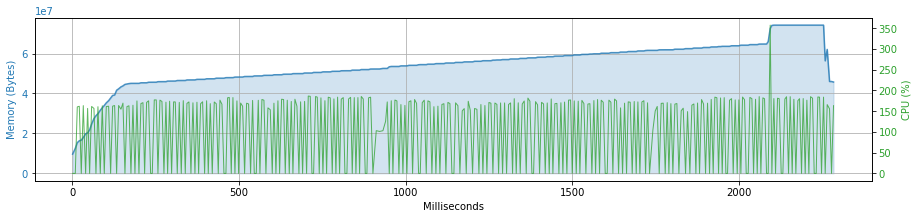

In [9]:
benchmark_results_bloom_filters_1.get_resources_plot()

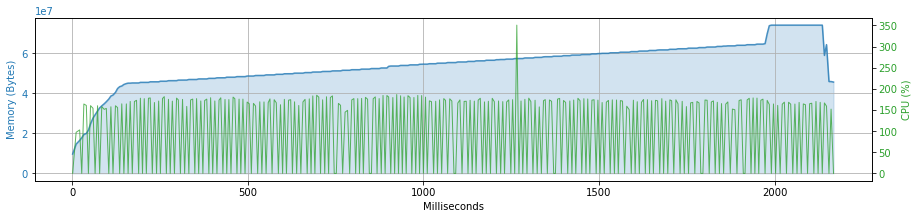

In [10]:
benchmark_results_bloom_filters_2.get_resources_plot()

In [11]:
# Index strain_1 and strain_2

command_index_bloom_filters = "bigsi build -b bloom-filters/{0}_1.bloom -b bloom-filters/{0}_2.bloom -s {0}_1 -s {0}_2 --config berkleydb.yaml".format(strain_name)
benchmark_results_index_bloom_filters = cmdbench.benchmark_command(command_index_bloom_filters)
print(command_index_bloom_filters)
print(benchmark_results_index_bloom_filters.get_first_iteration())
print(get_last_n_lines(benchmark_results_index_bloom_filters.get_first_iteration().process.stdout_data, 10))

bigsi build -b bloom-filters/2014C-3598_1.bloom -b bloom-filters/2014C-3598_2.bloom -s 2014C-3598_1 -s 2014C-3598_2 --config berkleydb.yaml
{
  'cpu': {
    'system_time': 217.67,
    'total_time': 464.27,
    'user_time': 246.6,
  },
  'disk': {
    'read_bytes': 0,
    'read_chars': 454339204043,
    'total_bytes': 31205150720,
    'total_chars': 908525741417,
    'write_bytes': 31205150720,
    'write_chars': 454186537374,
  },
  'memory': {
    'max': 330211328,
    'max_perprocess': 330211328,
  },
  'process': {
    'execution_time': 466.017,
    'stderr_data': 'INFO:bigsi.cmds.build:Building index:
                    0/1\n\nDEBUG:bigsi.cmds.build:Loading
                    ...(8 hidden lines)',
    'stdout_data': '{'result': 'success'}\n',
  },
  'time_series': {
    'cpu_percentages': array([  0. , 160.1,   0. , ..., 160.4, 160.7,   0. ])
    'memory_bytes': array([ 9383936, 12300288, 14991360, ..., 64696320, 64434176,        0])
    'sample_milliseconds': array([     1,     

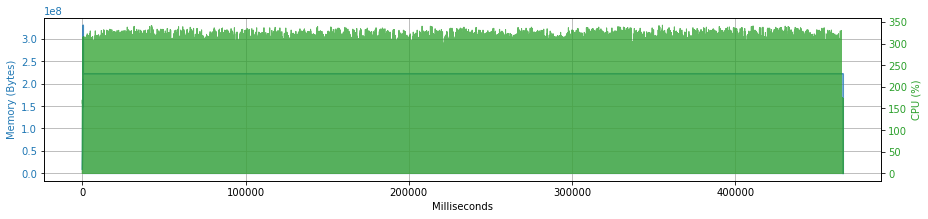

In [12]:
benchmark_results_index_bloom_filters.get_resources_plot()

In [13]:
# SEARCH

test_sequence = "GAAGAAGATGGTGTACGCGGTGCGCGCCGCTATCTCGACCACCTTAAAATGGAATATGCCTTCTGGATGGACGGTGCAGAATCGTTGATCCCTAATCAGGCCTATCGC"
command_search = "bigsi search {0} --config berkleydb.yaml".format(test_sequence)
benchmark_results_search = cmdbench.benchmark_command(command_search)
print(command_search)
print(benchmark_results_search.get_first_iteration())
print(get_last_n_lines(benchmark_results_search.get_first_iteration().process.stdout_data, 100))

bigsi search GAAGAAGATGGTGTACGCGGTGCGCGCCGCTATCTCGACCACCTTAAAATGGAATATGCCTTCTGGATGGACGGTGCAGAATCGTTGATCCCTAATCAGGCCTATCGC --config berkleydb.yaml
{
  'cpu': {
    'system_time': 0.02,
    'total_time': 0.18,
    'user_time': 0.16,
  },
  'disk': {
    'read_bytes': 0,
    'read_chars': 7916070,
    'total_bytes': 0,
    'total_chars': 7916482,
    'write_bytes': 0,
    'write_chars': 412,
  },
  'memory': {
    'max': 46661632,
    'max_perprocess': 46661632,
  },
  'process': {
    'execution_time': 0.183,
    'stderr_data': '',
    'stdout_data': '{\n\n    "query": "GAAGAAGATGGTGTACGCGGTGCGCGCCGCTATCTCGACCA
                    CCTTAAAATGGAATATGCCTTCTGGATGGACGGTGCAGAATCGTTGATCCCTAATCAGGC
                    ...(6 hidden lines)',
  },
  'time_series': {
    'cpu_percentages': array([  0. , 143.3,   0. , ..., 161.8, 154.7,   0. ])
    'memory_bytes': array([ 9220096, 12083200, 15478784, ..., 46661632, 46661632, 46399488])
    'sample_milliseconds': array([  0,   8,  17, ..., 160, 167, 1

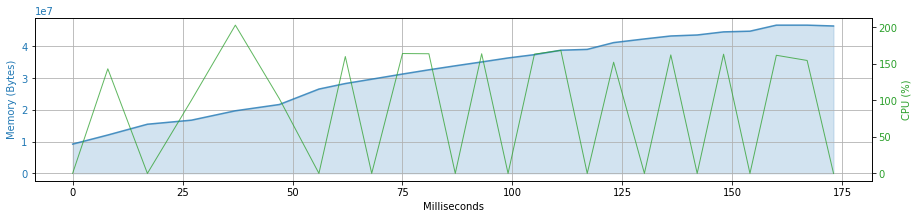

In [14]:
benchmark_results_search.get_resources_plot()